In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

# Load Data
df = pd.read_excel("Superstore Sales Data.xlsx")
print("✅ Data Loaded Successfully")
print(df.head())



✅ Data Loaded Successfully
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2     3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3     4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0    

In [73]:
#Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Category'] = df['Category'].str.strip()
df['Sub-Category'] = df['Sub-Category'].str.strip()

In [74]:
# KPIs

total_sales = round(df['Sales'].sum(), 2)
total_profit = round(df['Profit'].sum(), 2)
total_orders = df['Order ID'].nunique()



In [75]:
#Aggreagtion for charts
# Monthly Sales
df['Month_Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Sales'].sum()


# Profit vs Sales by Category
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()

# Top 10 Products
top_products = (
    df.groupby("Product Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

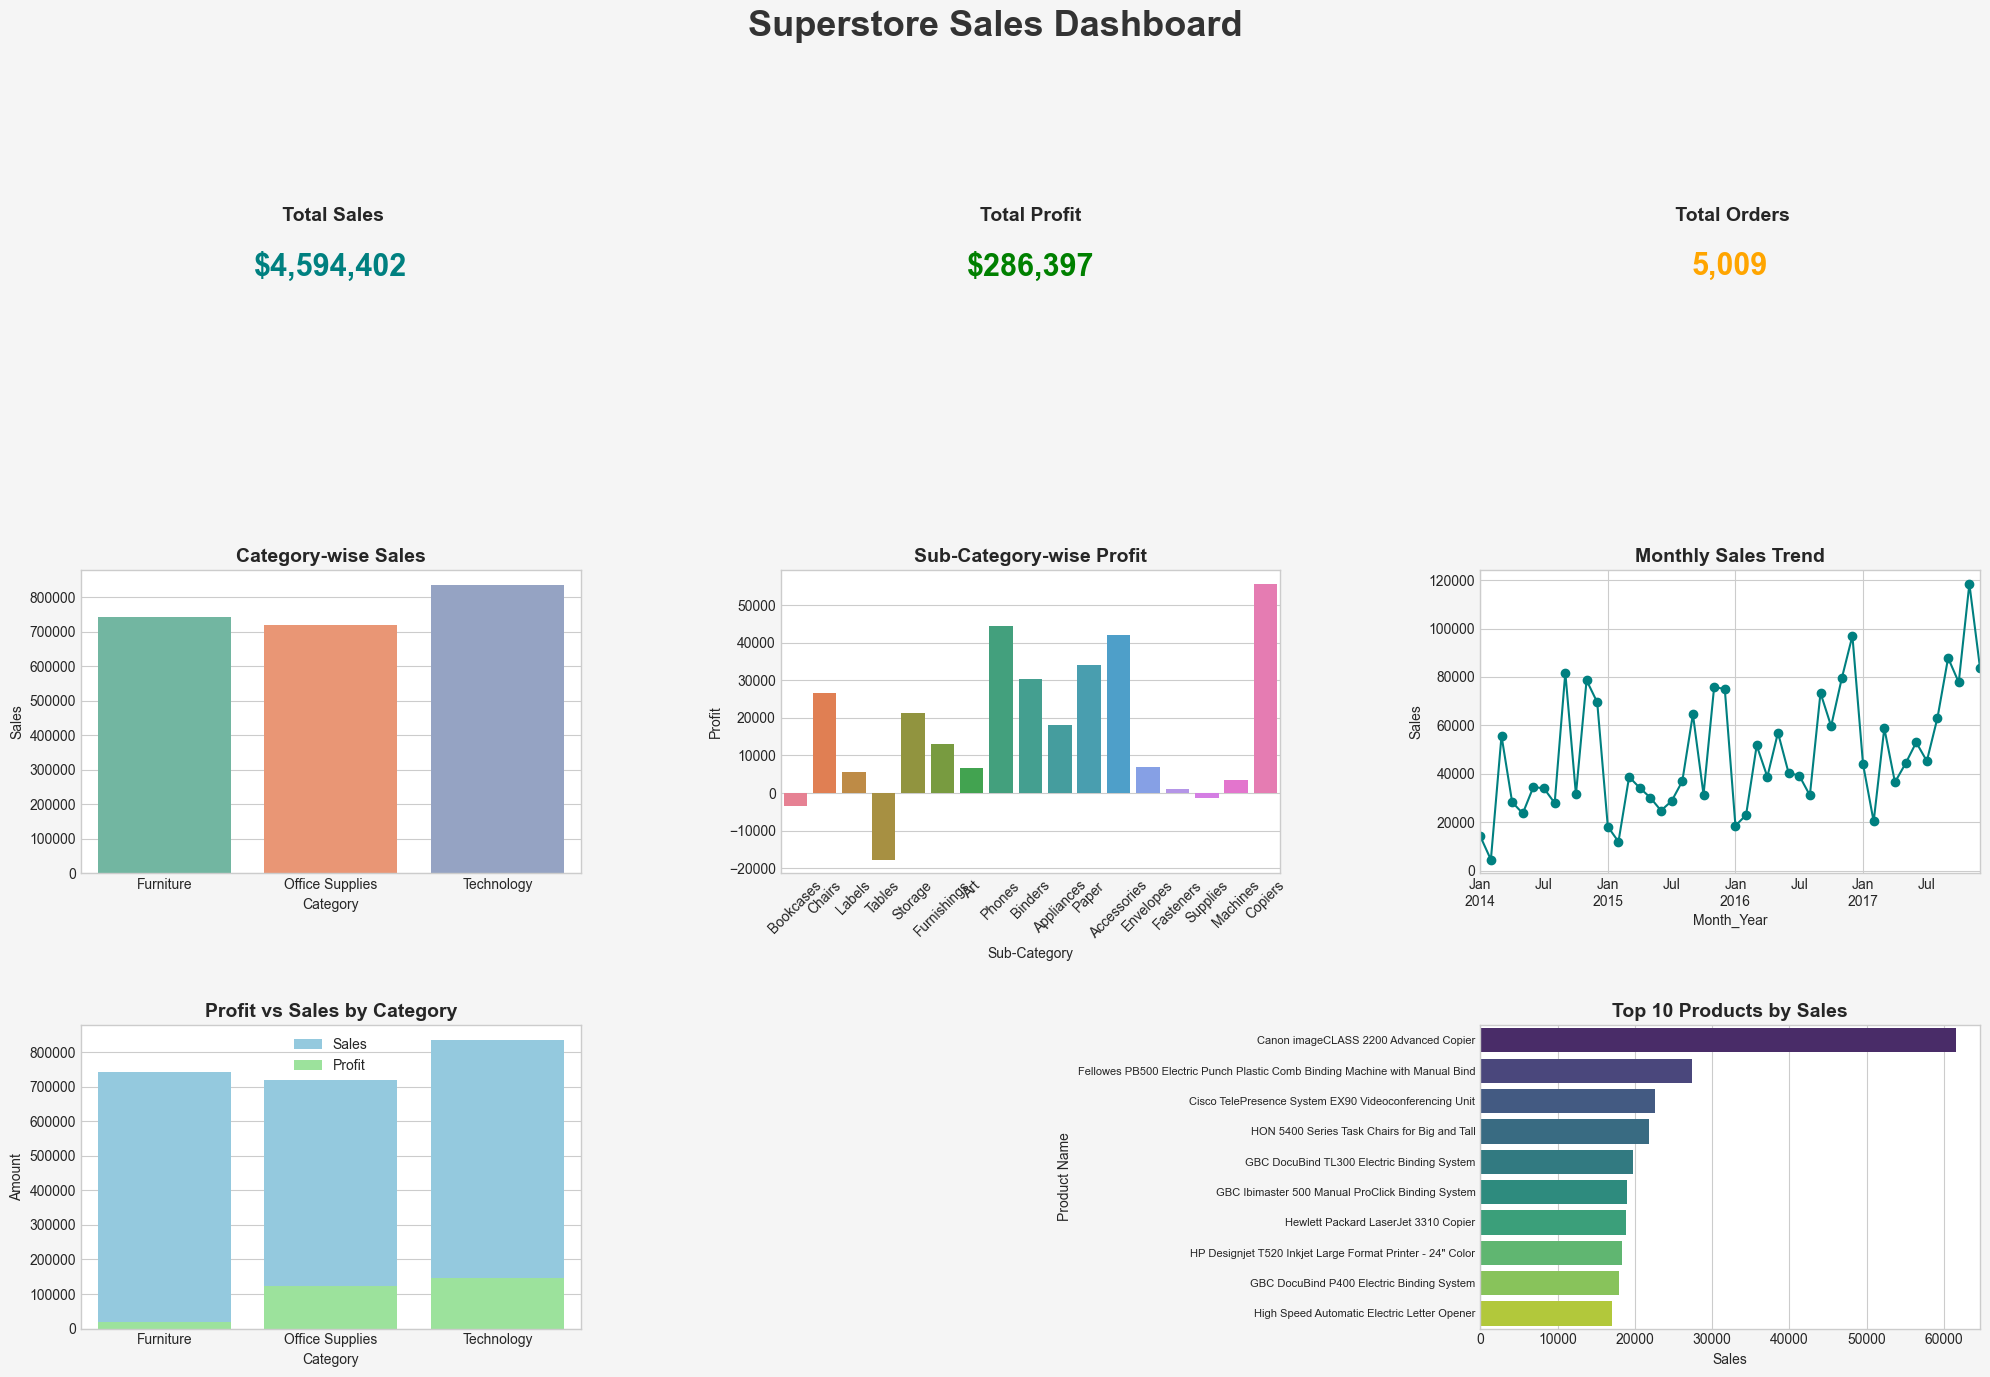

In [82]:
#Dashboard Layout

fig=plt.figure(figsize=(20,14))
fig.patch.set_facecolor("#f5f5f5")  # Background color
fig.suptitle("Superstore Sales Dashboard", fontsize=26, weight="bold", color="#333333")

# ----- KPI Boxes -----
ax1 = plt.subplot(3,3,1); 
ax1.axis("off"); 
ax1.set_facecolor("#e8f4f8")
ax1.text(0.5,0.65," Total Sales",ha="center",fontsize=14,weight="bold")
ax1.text(0.5,0.5,f"${total_sales:,.0f}",ha="center",va="center",fontsize=22,color="teal",weight="bold")

ax2 = plt.subplot(3,3,2); 
ax2.axis("off"); 
ax2.set_facecolor("#eaf7ea")
ax2.text(0.5,0.65,"Total Profit",ha="center",fontsize=14,weight="bold")
ax2.text(0.5,0.5,f"${total_profit:,.0f}",ha="center",va="center",fontsize=22,color="green",weight="bold")

ax3 = plt.subplot(3,3,3); 
ax3.axis("off"); 
ax3.set_facecolor("#fcefe6")
ax3.text(0.5,0.65," Total Orders",ha="center",fontsize=14,weight="bold")
ax3.text(0.5,0.5,f"{total_orders:,}",ha="center",va="center",fontsize=22,color="orange",weight="bold")

# ----- Category-wise Sales -----
plt.subplot(3,3,4)
sns.barplot(x='Category', y='Sales', hue='Category',data=df, estimator=sum, errorbar=None,dodge=False,legend=False)
plt.title("Category-wise Sales", fontsize=14, weight="bold")

# ----- Sub-Category-wise Profit -----
plt.subplot(3,3,5)
sns.barplot(x='Sub-Category', y='Profit', hue='Sub-Category',data=df, estimator=sum, errorbar=None,dodge=False,legend=False)
plt.xticks(rotation=45)
plt.title("Sub-Category-wise Profit", fontsize=14, weight="bold")

# ----- Monthly Sales Trend -----
plt.subplot(3,3,6)
monthly_sales.plot(kind='line', marker='o', color="teal")
plt.title("Monthly Sales Trend", fontsize=14, weight="bold")
plt.ylabel("Sales")


# ----- Profit vs Sales by Category -----
plt.subplot(3,3,7)
sns.barplot(x="Category", y="Sales",data=category_summary,color="skyblue",label="Sales",dodge=True)
sns.barplot(x="Category", y="Profit", data=category_summary,color="lightgreen",label="Profit",dodge=True)
plt.title("Profit vs Sales by Category", fontsize=14, weight="bold")
plt.ylabel("Amount")
plt.xlabel("Category")
plt.legend()

# ----- Top 10 Products -----
plt.subplot(3,3,9)
sns.barplot(y=top_products.index, x=top_products.values, hue=top_products.index, palette="viridis",dodge=False,legend=False)
plt.title("Top 10 Products by Sales", fontsize=14, weight="bold")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.yticks(fontsize=8)

plt.tight_layout(rect=[0,0,1,0.95])
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.savefig("Sales Dashboard.png",dpi=300,bbox_inches="tight")
plt.show()